#### Applied Predictive Modeling of Automotive Sales: A Comparative Study of Machine Learning and Time Series Algorithmic Approaches with Emphasis on Model Selection and Real-World Feature Engineering

In [14]:
# Data Handling
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
from numpy.random import normal, seed

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import pylab
import hvplot as hv

# Warnings
import warnings

# Statistical Analysis
import scipy.stats
from scipy.stats import (
    boxcox, chi2_contingency, norm, shapiro, kstest, normaltest
)

# Feature Engineering & Modeling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

# Time Series Analysis
import pmdarima as pm
import yfinance as yf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import aic, bic, rmspe, rmse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import kstest_normal, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Miscellaneous
import math

In [12]:
import warnings; warnings.filterwarnings('ignore')

In [16]:
file_path = Path('data/car_sales.csv')

In [34]:
df = pd.read_csv(file_path, sep=',')

In [36]:
df.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
1,Mazda,Mazda3,2000,12027.14,60990,Brown,Certified Pre-Owned,John,Harris,101 Maple Dr,Italy
2,Mazda,CX-5,2014,49194.93,1703,Green,Certified Pre-Owned,Karen,Wilson,202 Birch Blvd,UK
3,Hyundai,Tucson,2003,11955.94,25353,Silver,Used,Susan,Martinez,123 Main St,Mexico
4,Land Rover,Range Rover,2012,10910.01,76854,Orange,Used,Charles,Miller,456 Oak Ave,USA


In [42]:
import dataframe_image as dfi
dfi.export(df.head(), 'dataframe_image.png', table_conversion='matplotlib')

In [44]:
df.tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
999995,Honda,Pilot,2013,15546.60,107099,Green,New,Laura,Taylor,456 Oak Ave,UK
999996,Hyundai,Sonata,2024,52595.03,159945,Blue,Certified Pre-Owned,Emily,Moore,303 Cedar Ln,USA
999997,Nissan,Murano,2014,48278.62,43711,Gray,Used,Robert,Brown,789 Pine Rd,Italy
999998,Nissan,Sentra,2002,53124.63,101405,Yellow,Certified Pre-Owned,Angela,Martinez,404 Spruce Ct,France
999999,Hyundai,Santa Fe,2024,24576.49,115595,Black,Used,Jane,Taylor,789 Pine Rd,Italy


In [46]:
dfi.export(df.tail(), 'df_tail_initial.png', table_conversion='matplotlib')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Brand       1000000 non-null  object 
 1   Model       1000000 non-null  object 
 2   Year        1000000 non-null  int64  
 3   Price       1000000 non-null  float64
 4   Mileage     1000000 non-null  int64  
 5   Color       1000000 non-null  object 
 6   Condition   1000000 non-null  object 
 7   First Name  1000000 non-null  object 
 8   Last Name   1000000 non-null  object 
 9   Address     1000000 non-null  object 
 10  Country     1000000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 83.9+ MB


In [52]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
plt.figure(figsize=(8, 6))
plt.text(0, 1, info_str, fontsize=10, family='monospace')
plt.axis('off')
plt.savefig("df_info.png", bbox_inches='tight')
plt.close()

In [68]:
df.columns.to_list()

['Brand',
 'Model',
 'Year',
 'Price',
 'Mileage',
 'Color',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Country']

In [70]:
df.dtypes

Brand          object
Model          object
Year            int64
Price         float64
Mileage         int64
Color          object
Condition      object
First Name     object
Last Name      object
Address        object
Country        object
dtype: object

## Data Handling

In [55]:
df.isna()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df.isna().sum()

Brand         0
Model         0
Year          0
Price         0
Mileage       0
Color         0
Condition     0
First Name    0
Last Name     0
Address       0
Country       0
dtype: int64

In [59]:
df.isna().sum().sum()

0

In [72]:
columns_with_missings = df.columns[df.isnull().any()]

In [86]:
if columns_with_missings > 1:
    print(columns_with_missings)
else:
    print('No Missing Values Found!')

No Missing Values Found!


In [88]:
df[columns_with_missings].isnull().sum()

Series([], dtype: float64)

In [90]:
print('Frequency counts for Brand: \n')
print(df.Brand.value_counts(dropna=False))

Frequency counts for Brand: 

Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


In [92]:
print('Frequency counts for Model: \n')
print(df.Model.value_counts(dropna=False))

Frequency counts for Model: 

Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


In [94]:
print('Frequency counts for Color: \n')
print(df.Color.value_counts(dropna=False))

Frequency counts for Color: 

Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


In [96]:
print('Frequency counts for Condition: \n')
print(df.Condition.value_counts(dropna=False))

Frequency counts for Condition: 

Condition
New                    333537
Certified Pre-Owned    333390
Used                   333073
Name: count, dtype: int64


In [98]:
print('Frequency counts for Country: \n')
print(df.Country.value_counts(dropna=False))

Frequency counts for Country: 

Country
USA          100496
Japan        100182
Italy        100098
Brazil       100060
Australia    100053
Mexico        99989
UK            99897
Canada        99840
France        99770
Germany       99615
Name: count, dtype: int64


According to dataset and analysis, there are no missing values, we are good to go!

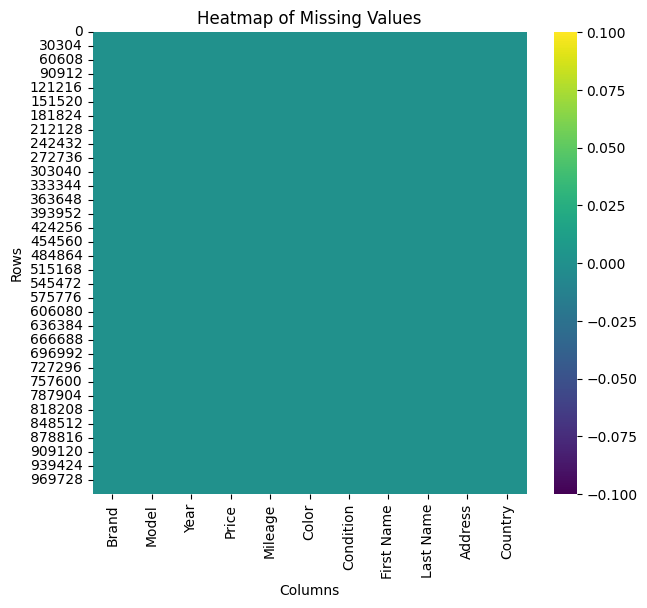

In [105]:
missing_values = df.isna()
missing_values_numeric = missing_values.astype(int)
plt.figure(figsize=(7, 6))
sns.heatmap(missing_values_numeric, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Brand       1000000 non-null  object 
 1   Model       1000000 non-null  object 
 2   Year        1000000 non-null  int64  
 3   Price       1000000 non-null  float64
 4   Mileage     1000000 non-null  int64  
 5   Color       1000000 non-null  object 
 6   Condition   1000000 non-null  object 
 7   First Name  1000000 non-null  object 
 8   Last Name   1000000 non-null  object 
 9   Address     1000000 non-null  object 
 10  Country     1000000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 83.9+ MB


## Distribution of Nominal Variables

In [108]:
nominal_variables = ['Brand', 'Model', 'Color', 'Condition', 'Country']

In [110]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    print('\n')
    print(df[var].value_counts(dropna=False))



Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


Condition
New                    333537
Certified Pre-Owned    333390
Used                 

As you can see all levels of each variable has observations > 100 which is good, if we had less than that most probably we could remove those levels.

In [116]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    levels_to_replace = value_counts[value_counts <= 50].index
    df[var] = df[var].replace(levels_to_replace, 'Other')

In [118]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    print('\n')
    print(df[var].value_counts(dropna=False))



Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


Condition
New                    333537
Certified Pre-Owned    333390
Used                 

In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size = 0.3,
    stratify = df['column'],
    random_state = False # 123456 - keep constant for reproductibility
)

## Near-zero variance

What can be still problematic however is the strong concentration of variable values in one level (issue called as near-zero variance) - such variables have little predictive power and can be omitted.

To identify variables that have a small variance, use a measure based on the ratio of the most frequent and second most frequent values (frequency ratio)
For well diversified variables it will take a value close to 1, and a very high value for unbalanced data.
Another useful measure is the percent of unique values: 100 * (number of unique values) / (number of observations)

It is close to zero for data that is not very diversified.
If the frequency ratio is greater than some threshold, and the "percent of unique values" is less than a certain limit value, we can assume that the variable has a variance close to 0 and can be potentially omitted.

=> define a function which will check it with the threshold 95/5 for the frequency ratio and 10 for the percent of unique values.

In [126]:
def near_zero_variance(df, freq_cut = 95/5, unique_cut = 10):
    results = []
    for col in df.columns:
        counts = df[col].value_counts()
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf') # only one unique value

        # calculate unique_ratio
        unique_ratio = len(counts) / len(df)
        # determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)
        # append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })
        # convert results to a DataFrame
        results_df = pd.DataFrame(results)
        # sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
        results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], 
                                    ascending=[False, True])
        return results_df

In [128]:
df_nzv = near_zero_variance(df, freq_cut = 97/3, unique_cut = 10)

In [138]:
try:
    print(df_nzv[(df_nzv['low_unique_ratio'==1]) & (df_nzv['high_freq_ratio']==1)])
except:
    print('Error occured')

Error occured


In [142]:
df[:900000].tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
899995,Land Rover,Defender,2015,63994.42,59907,Red,Certified Pre-Owned,Daniel,Miller,505 Elm St,France
899996,Mercedes-Benz,GLE,2012,32537.65,104150,Black,Used,Angela,Smith,606 Cherry Rd,USA
899997,Kia,Seltos,2016,39006.77,62487,Orange,Certified Pre-Owned,Karen,Thompson,202 Birch Blvd,France
899998,Lexus,GX,2020,54536.56,79456,Brown,New,Joseph,Moore,505 Elm St,Italy
899999,BMW,5 Series,2020,5254.98,67115,Yellow,New,Joseph,Garcia,202 Birch Blvd,UK


In [144]:
df[900000:].head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
900000,Land Rover,Velar,2006,34905.91,83387,Brown,Used,Angela,Wilson,303 Cedar Ln,Italy
900001,Mercedes-Benz,GLE,2012,78142.32,8186,Green,New,Daniel,Brown,707 Willow St,Mexico
900002,Nissan,Titan,2011,41708.84,73803,Orange,Certified Pre-Owned,Robert,Hernandez,606 Cherry Rd,Brazil
900003,Subaru,Forester,2001,67885.10,183049,Red,Certified Pre-Owned,Sarah,Thomas,456 Oak Ave,USA
900004,Chrysler,300,2021,29298.84,8317,Silver,New,Daniel,Miller,123 Main St,Mexico


In [146]:
df.Year.value_counts()

Year
2015    40354
2011    40343
2002    40278
2003    40263
2024    40153
2020    40139
2001    40132
2016    40079
2022    40041
2007    40034
2023    40022
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2021    39876
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64

In [148]:
df_copy1 = df.copy()

## Train / Test Split

### Data Splitting Strategy

To prepare the dataset for modeling, I considered the following data splitting options:

1. **Index-Based Split (80/20)**  
   - Split the dataset by row index.
   - Simple but assumes data is randomly ordered, which may not hold true.

2. **Random Split (80/20 using `train_test_split`)**  
   - Randomly selects 80% of data for training and 20% for testing.
   - Effective for models where data is i.i.d. (independent and identically distributed).
   - Risk of data leakage in time-sensitive features.

3. **Year-Based Split** ✅  
   - Train on data from earlier years (e.g., before 2020), test on newer years (2020 and beyond).
   - Mimics real-world scenarios where past data is used to predict future outcomes.
   - Avoids temporal data leakage and maintains chronological integrity.

#### Chosen Approach: Year-Based Split
For this study, I chose the **year-based split** to simulate realistic forecasting conditions in car price prediction. This ensures that the model is trained on historical data and tested on unseen future-like data, which is essential for evaluating how the model generalizes over time.

#### Benefits:
- Prevents information leakage from future years.
- Enhances model relevance for time-dependent predictions.
- Reflects real deployment scenarios in pricing strategy and market forecasting.


In [152]:
df_train = df[df['Year'] < 2020]
df_test = df[df['Year'] >= 2020]

### Year-Based Train-Test Split

To preserve the temporal structure of the dataset and prevent data leakage, the dataset was split based on the `Year` column:

- **Training Set (`df_train`)**:  
  Includes all entries where `Year` is **less than 2020**.  
  - **Years covered**: 2000 to 2019  
  - **Used for model training**

- **Testing Set (`df_test`)**:  
  Includes all entries where `Year` is **2020 or later**.  
  - **Years covered**: 2020 to 2024  
  - **Used for model evaluation**

This approach simulates a real-world forecasting scenario by ensuring the model learns only from past data when making predictions on future records.


In [155]:
df_train.tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
999992,Jeep,Compass,2001,44984.83,92835,Red,Certified Pre-Owned,Daniel,Harris,101 Maple Dr,Germany
999994,Honda,Pilot,2005,9795.65,6825,Silver,Used,Michael,Garcia,123 Main St,Italy
999995,Honda,Pilot,2013,15546.60,107099,Green,New,Laura,Taylor,456 Oak Ave,UK
999997,Nissan,Murano,2014,48278.62,43711,Gray,Used,Robert,Brown,789 Pine Rd,Italy
999998,Nissan,Sentra,2002,53124.63,101405,Yellow,Certified Pre-Owned,Angela,Martinez,404 Spruce Ct,France


In [157]:
df_test.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
6,Audi,A4,2021,25023.34,179187,Blue,Certified Pre-Owned,Jessica,Harris,101 Maple Dr,UK
13,Honda,CR-V,2020,43074.72,52143,Green,Used,Jessica,Harris,606 Cherry Rd,USA
19,Kia,Sportage,2021,41406.09,141356,Green,Certified Pre-Owned,Charles,Martin,505 Elm St,Germany
31,Jeep,Wrangler,2021,66282.81,78480,Blue,New,James,Brown,456 Oak Ave,Italy


In [167]:
df_train.Year.value_counts()

Year
2015    40354
2011    40343
2002    40278
2003    40263
2001    40132
2016    40079
2007    40034
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64

In [171]:
df_test.Year.value_counts()

Year
2024    40153
2020    40139
2022    40041
2023    40022
2021    39876
Name: count, dtype: int64

In [176]:
for col in nominal_variables:
    print(f"\n{col} distribution:\n")
    print(df[col].value_counts())


Brand distribution:

Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64

Model distribution:

Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64

Color distribution:

Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64

Condition distribution:

Conditi

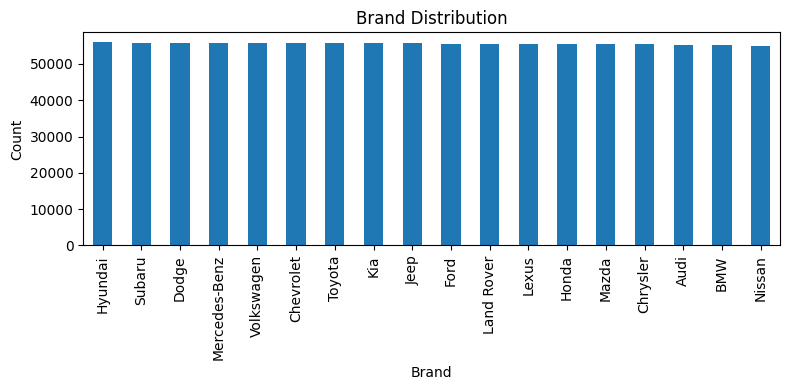

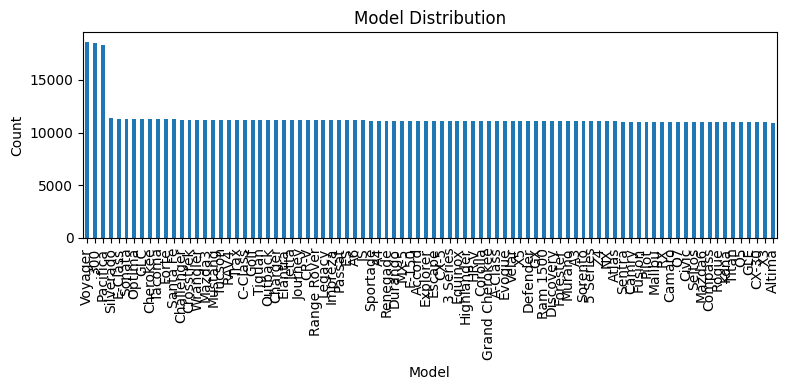

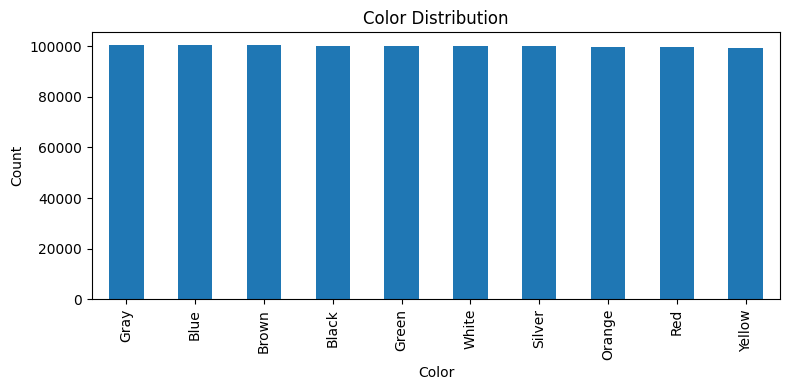

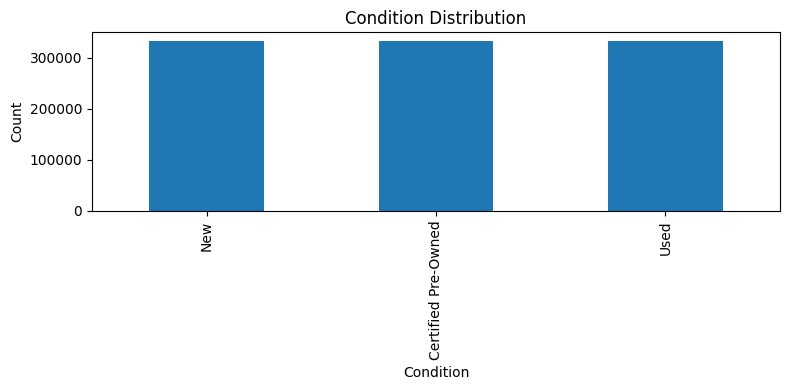

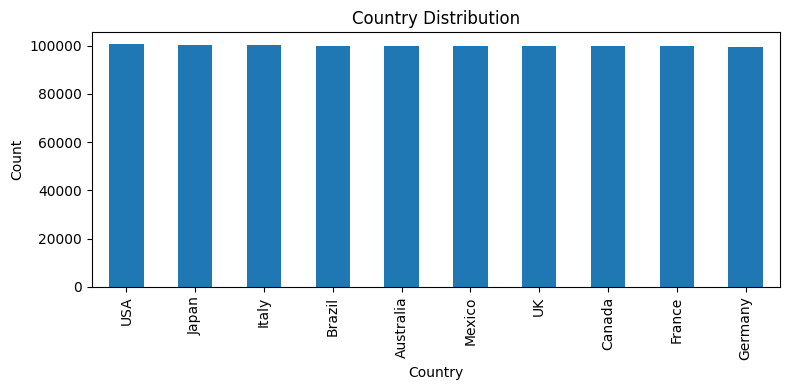

In [178]:
for col in nominal_variables:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4), title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Distribution of the dependent variable

### Target and Feature Variables

In this study, the goal is to **predict car prices** using available vehicle and owner-related features.

- **Dependent Variable (Target):**
  - `Price`: The numerical value representing the market price of a car.

- **Independent Variables (Predictors):**
  - All other columns excluding `Price` (e.g., `Brand`, `Model`, `Year`, `Mileage`, `Color`, `Condition`, etc.)

These independent variables will be analyzed to determine their individual and combined influence on the car's price. This involves:
- Exploring distributions and relationships
- Performing statistical tests and correlation analysis
- Building predictive models (e.g., Linear Regression, Logistic Regression)

This approach supports both **exploratory data analysis (EDA)** and **predictive modeling** to understand which features most significantly impact car pricing.


Distribution (histogram) of the dependent variable Price

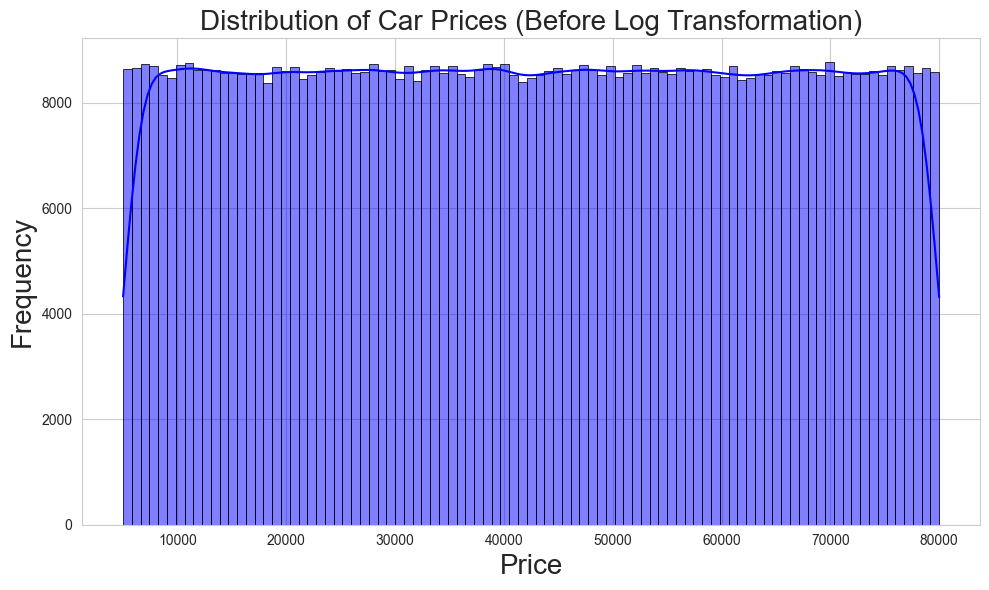

In [205]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(df_train['Price'], kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Car Prices (Before Log Transformation)", fontsize=20)
plt.xlabel("Price", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

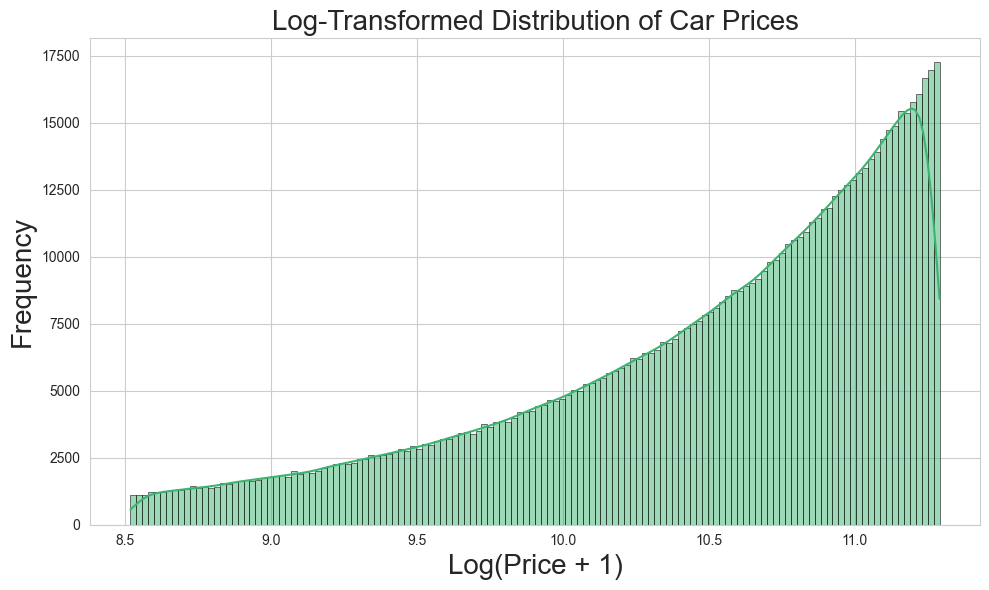

In [209]:
# Log transform
df_train['Price_Log'] = np.log(df_train['Price'] + 1)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(df_train['Price_Log'], kde=True, color='mediumseagreen', edgecolor='black')
plt.title("Log-Transformed Distribution of Car Prices", fontsize=20)
plt.xlabel("Log(Price + 1)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

## Levels of Numerical Variables

In [212]:
numeric_variables = df_train.select_dtypes(include=[np.number]).columns

In [234]:
numeric_variables = numeric_variables.drop('Price_Log')

In [236]:
numeric_variables

Index(['Year', 'Price', 'Mileage'], dtype='object')

In [244]:
for col in numeric_variables:
    unique_vals = df_train[col].unique()
    n_unique = len(unique_vals)
    print(f'Column {col} has {n_unique} unique values.')
    # Print frequency tables for those that have only 3-5 levels
    if n_unique <= 20:
        print(f'Frequency table for {col}:')
        print(df_train[col].value_counts(dropna = False), "\n")

Column Year has 20 unique values.
Frequency table for Year:
Year
2015    40354
2011    40343
2002    40278
2003    40263
2001    40132
2016    40079
2007    40034
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64 

Column Price has 758575 unique values.
Column Mileage has 196361 unique values.


### Analysis of Numerical Variables

In this analysis, the unique values and frequency distribution of numerical variables are explored to understand their structure.

1. **Year**  
   - The `Year` column contains **20 unique values**, corresponding to different car model years.  
   - The distribution shows that the number of cars for each year is fairly balanced, with the most recent years (e.g., 2015, 2011) having slightly higher counts.  
   - **Frequency distribution** of `Year`:

     ```
     2015    40354
     2011    40343
     2002    40278
     2003    40263
     2001    40132
     2016    40079
     2007    40034
     2004    40011
     2005    39990
     2000    39988
     2012    39947
     2014    39925
     2019    39871
     2013    39866
     2010    39865
     2018    39813
     2009    39765
     2017    39762
     2006    39742
     2008    39741
     ```

2. **Price**  
   - The `Price` column has **758,575 unique values**, indicating a continuous distribution of prices for cars in the dataset. This suggests that the prices are highly variable and likely influenced by several factors such as brand, model, mileage, and condition.

3. **Mileage**  
   - The `Mileage` column contains **196,361 unique values**, indicating that the mileage varies significantly across the dataset. This high variability reflects the fact that cars of different ages and conditions will have different mileage values.

This analysis helps inform future steps in preprocessing and feature engineering, such as scaling or transforming variables like `Price` and `Mileage`.


In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799769 entries, 1 to 999998
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Brand       799769 non-null  object 
 1   Model       799769 non-null  object 
 2   Year        799769 non-null  int64  
 3   Price       799769 non-null  float64
 4   Mileage     799769 non-null  int64  
 5   Color       799769 non-null  object 
 6   Condition   799769 non-null  object 
 7   First Name  799769 non-null  object 
 8   Last Name   799769 non-null  object 
 9   Address     799769 non-null  object 
 10  Country     799769 non-null  object 
 11  Price_Log   799769 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 79.3+ MB


## Levels of Ordinal Variables

#### Ordinal Variables and Their Levels

In this analysis, certain categorical variables in the dataset are identified as **ordinal**, meaning they have a meaningful order or ranking. Below are the ordinal variables and their respective levels:

1. **Condition**
   - **Levels**: 
     - `New`
     - `Certified Pre-Owned`
     - `Used`
   - **Order**:  
     The `Condition` variable is ordinal because there is a clear ranking between the levels:
     - `New` > `Certified Pre-Owned` > `Used`
     - This order reflects the quality and price range of the cars.

2. **Country**
   - **Levels**: 
     - `USA`, `Japan`, `Italy`, `Brazil`, `Australia`, `Mexico`, `UK`, `Canada`, `France`, `Germany`, etc.
   - **Order**:  
     Although `Country` is technically nominal, it could be **ordered** based on car market size, production country, or geographical regions if required. However, this is not inherently an ordinal variable in this dataset.

### Other Variables (Nominal)
- **Brand**: Represents the car manufacturer (e.g., `Hyundai`, `Toyota`, `Ford`, etc.).
- **Model**: Represents the specific car model (e.g., `Voyager`, `300`, `Pacifica`).
- **Color**: Represents the color of the car (e.g., `Gray`, `Blue`, `Black`).

These variables are **nominal** since they don't have a meaningful order.


In [254]:
ordinal_variables = ['Condition']

In [256]:
for col in ordinal_variables:
    unique_vals = df_train[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")
    print(f"Frequency table for '{col}':")
    print(df_train[col].value_counts(dropna = False), "\n")

Column 'Condition' has 3 unique values.
Frequency table for 'Condition':
Condition
Certified Pre-Owned    266639
New                    266638
Used                   266492
Name: count, dtype: int64 



## Encoding Categorical Variables

Most of machine learning algorithms like Linear Regression, Neural Networks, SVMs, KNN, etc are not designed to process text-based categorical data directly. So it is crucial to transform categorical data into a numerical form, a process known as data encoding.

Some tree-based ML algorithms like Decision Trees and Random Forests can handle categorical data natively, circumventing the need for encoding. However, for most other algorithms, encoding is a vital preprocessing step.



## Encoding Ordinal Variables

In [261]:
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

In [263]:
ordinal_variables_to_transform = ['Condition']

In [265]:
Condition_order = ['New', 'Certified Pre-Owned', 'Used']

Then initialize OrdinalEncoder providing a list of categories for each of the variables which will be transformed. If the argument categories= is an array, it has to be of shape (n_features, ). Put the list in the same order as in ordinal_variables_to_transform.

In [270]:
encoder_ord = OrdinalEncoder(categories = [Condition_order],
                            handle_unknown = 'use_encoded_value',
                            unknown_value = -1
                            )

fit_transform() method applied on training data and transform() method on test data
Using the transform() method we apply the same rules defined on the training data to transform the test data.

In [273]:
df_train_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(df_train_encoded[ordinal_variables_to_transform])

In [279]:
df_test_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(df_test_encoded[ordinal_variables_to_transform])

In [301]:
df_train_encoded.iloc[:,3:8].head()

,Price,Mileage,Color,Condition,First Name
1,12027.14,60990,Brown,1.0,John
2,49194.93,1703,Green,1.0,Karen
3,11955.94,25353,Silver,2.0,Susan
4,10910.01,76854,Orange,2.0,Charles
5,69148.83,26476,Gray,2.0,Joseph


In [307]:
df_train.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
1,12027.14,60990,Brown,Certified Pre-Owned,John
2,49194.93,1703,Green,Certified Pre-Owned,Karen
3,11955.94,25353,Silver,Used,Susan
4,10910.01,76854,Orange,Used,Charles
5,69148.83,26476,Gray,Used,Joseph


In [303]:
df_test_encoded.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
0,25627.20,58513,Green,1.0,Emily
6,25023.34,179187,Blue,1.0,Jessica
13,43074.72,52143,Green,2.0,Jessica
19,41406.09,141356,Green,1.0,Charles
31,66282.81,78480,Blue,0.0,James


In [309]:
df_test.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
0,25627.20,58513,Green,Certified Pre-Owned,Emily
6,25023.34,179187,Blue,Certified Pre-Owned,Jessica
13,43074.72,52143,Green,Used,Jessica
19,41406.09,141356,Green,Certified Pre-Owned,Charles
31,66282.81,78480,Blue,New,James


In [305]:
dfi.export(df_train_encoded.iloc[:,3:8].head(), 
                    'df_train_ord_encoded.png', table_conversion='matplotlib')

## Encoding Nominal Variables

One-hot encoding is appropriate when the categories do not have an intrinsic ordering or relationship with each other. This is because one-hot encoding treats each category as a separate entity with no relation to the other categories. One-hot encoding is also useful when the number of categories is relatively small, as the number of columns can become unwieldly for very large numbers of categories.

pandas.get_dummies is a straightforward to use and it automatically converts only the listed column(s), keeping all others untouched, but copying them into a resulting dataset.

Another approach is to use OneHotEncoder from the sklearn library, which is useful in Machine Learning tasks.

The difference is pandas.get_dummies cannot learn encodings - store the rules to apply it on another dataset. It can only perform one-hot-encoding on the dataset you pass as an input.

sklearn.OneHotEncoder is a class that can be saved and used to transform other incoming datasets in the future. However, it requires more data transformations if applied out of the model pipeline.

In [319]:
nominal_variables = nominal_variables.remove('Condition')

In [323]:
nominal_variables

In [325]:
nominal_variables = ['Brand', 'Model', 'Color', 'Country']

In [327]:
nominal_variables_left = nominal_variables

In [331]:
# one-hot encoding using the pandas get_dummies()

# train
df_train_encoded = pd.get_dummies(df_train_encoded,
                                  columns = nominal_variables_left,
                                  drop_first = True,
                                  dtype = int
                                 )

In [333]:
# test
df_test_encoded = pd.get_dummies(df_test_encoded,
                                 columns = nominal_variables_left,
                                 drop_first = True,
                                 dtype = int
                                )

In [335]:
df_train_encoded.head()

,Year,Price,Mileage,Condition,First Name,Last Name,Address,Price_Log,Brand_BMW,Brand_Chevrolet,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
1,2000,12027.14,60990,1.0,John,Harris,101 Maple Dr,9.395004,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2014,49194.93,1703,1.0,Karen,Wilson,202 Birch Blvd,10.803566,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2003,11955.94,25353,2.0,Susan,Martinez,123 Main St,9.389067,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,10910.01,76854,2.0,Charles,Miller,456 Oak Ave,9.297528,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2002,69148.83,26476,2.0,Joseph,Moore,789 Pine Rd,11.144031,0,0,...,0,0,0,1,0,0,0,0,0,0


In [337]:
df_test_encoded.head()

,Year,Price,Mileage,Condition,First Name,Last Name,Address,Brand_BMW,Brand_Chevrolet,Brand_Chrysler,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
0,2023,25627.20,58513,1.0,Emily,Harris,456 Oak Ave,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2021,25023.34,179187,1.0,Jessica,Harris,101 Maple Dr,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,2020,43074.72,52143,2.0,Jessica,Harris,606 Cherry Rd,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,2021,41406.09,141356,1.0,Charles,Martin,505 Elm St,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,2021,66282.81,78480,0.0,James,Brown,456 Oak Ave,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### above is one-hot encoded
### below is original dataset

In [340]:
df_train.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country,Price_Log
1,Mazda,Mazda3,2000,12027.14,60990,Brown,Certified Pre-Owned,John,Harris,101 Maple Dr,Italy,9.395004
2,Mazda,CX-5,2014,49194.93,1703,Green,Certified Pre-Owned,Karen,Wilson,202 Birch Blvd,UK,10.803566
3,Hyundai,Tucson,2003,11955.94,25353,Silver,Used,Susan,Martinez,123 Main St,Mexico,9.389067
4,Land Rover,Range Rover,2012,10910.01,76854,Orange,Used,Charles,Miller,456 Oak Ave,USA,9.297528
5,Kia,Sportage,2002,69148.83,26476,Gray,Used,Joseph,Moore,789 Pine Rd,France,11.144031


In [342]:
df_test.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
6,Audi,A4,2021,25023.34,179187,Blue,Certified Pre-Owned,Jessica,Harris,101 Maple Dr,UK
13,Honda,CR-V,2020,43074.72,52143,Green,Used,Jessica,Harris,606 Cherry Rd,USA
19,Kia,Sportage,2021,41406.09,141356,Green,Certified Pre-Owned,Charles,Martin,505 Elm St,Germany
31,Jeep,Wrangler,2021,66282.81,78480,Blue,New,James,Brown,456 Oak Ave,Italy


### Encoded DF

In [345]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799769 entries, 1 to 999998
Columns: 130 entries, Year to Country_USA
dtypes: float64(2), int32(122), int64(2), object(4)
memory usage: 443.2+ MB


In [347]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200231 entries, 0 to 999999
Columns: 129 entries, Year to Country_USA
dtypes: float64(1), int32(122), int64(2), object(4)
memory usage: 105.4+ MB


In [349]:
df_train_encoded.describe()

,Year,Price,Mileage,Price_Log,Brand_BMW,Brand_Chevrolet,Brand_Chrysler,Brand_Dodge,Brand_Ford,Brand_Honda,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
count,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.00000,799769.000000,799769.00000,799769.000000,...,799769.000000,799769.000000,799769.00000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000
mean,2009.492341,42488.623291,99997.351644,10.474032,0.055228,0.055612,0.05539,0.055992,0.05556,0.055497,...,0.099505,0.100106,0.09991,0.099854,0.099780,0.100238,0.100190,0.099710,0.099641,0.100484
std,5.767600,21661.707252,57730.926207,0.674026,0.228426,0.229172,0.22874,0.229907,0.22907,0.228948,...,0.299339,0.300142,0.29988,0.299805,0.299707,0.300317,0.300254,0.299613,0.299521,0.300644
min,2000.000000,5000.060000,0.000000,8.517405,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,23741.540000,50053.000000,10.075024,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,42482.600000,99969.000000,10.656873,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,61230.270000,149990.000000,11.022413,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,79999.960000,200000.000000,11.289794,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
df_train_encoded.columns.to_list()

['Year',
 'Price',
 'Mileage',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Price_Log',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Chrysler',
 'Brand_Dodge',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_Lexus',
 'Brand_Mazda',
 'Brand_Mercedes-Benz',
 'Brand_Nissan',
 'Brand_Subaru',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_300',
 'Model_5 Series',
 'Model_A-Class',
 'Model_A3',
 'Model_A4',
 'Model_A6',
 'Model_Accord',
 'Model_Altima',
 'Model_Atlas',
 'Model_C-Class',
 'Model_CR-V',
 'Model_CX-30',
 'Model_CX-5',
 'Model_Camaro',
 'Model_Camry',
 'Model_Challenger',
 'Model_Charger',
 'Model_Cherokee',
 'Model_Civic',
 'Model_Compass',
 'Model_Corolla',
 'Model_Crosstrek',
 'Model_Defender',
 'Model_Discovery',
 'Model_Durango',
 'Model_E-Class',
 'Model_ES',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Escape',
 'Model_Evoque',
 'Model_Explorer',
 'Model_F-150',
 'Model_Forester',
 'Model_Forte',
 'Model_F

In [355]:
df_test_encoded.columns.to_list()

['Year',
 'Price',
 'Mileage',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Chrysler',
 'Brand_Dodge',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_Lexus',
 'Brand_Mazda',
 'Brand_Mercedes-Benz',
 'Brand_Nissan',
 'Brand_Subaru',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_300',
 'Model_5 Series',
 'Model_A-Class',
 'Model_A3',
 'Model_A4',
 'Model_A6',
 'Model_Accord',
 'Model_Altima',
 'Model_Atlas',
 'Model_C-Class',
 'Model_CR-V',
 'Model_CX-30',
 'Model_CX-5',
 'Model_Camaro',
 'Model_Camry',
 'Model_Challenger',
 'Model_Charger',
 'Model_Cherokee',
 'Model_Civic',
 'Model_Compass',
 'Model_Corolla',
 'Model_Crosstrek',
 'Model_Defender',
 'Model_Discovery',
 'Model_Durango',
 'Model_E-Class',
 'Model_ES',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Escape',
 'Model_Evoque',
 'Model_Explorer',
 'Model_F-150',
 'Model_Forester',
 'Model_Forte',
 'Model_Fusion',
 'Mode

# Feature Selection

In [366]:
''' 
df 
df_copy
df_train
df_test
df_train_copy
df_test_copy
df_train_encoded
df_test_encoded

'''

' \ndf \ndf_copy\ndf_train\ndf_test\ndf_train_copy\ndf_test_copy\ndf_train_encoded\ndf_test_encoded\n\n'

In [364]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

---
For now forget about encoding and decoding stuff, I have prepared ready encoded version of the dataset, now it is important to analyze the relationship between variables.

---

In [370]:
df_train.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country,Price_Log
1,Mazda,Mazda3,2000,12027.14,60990,Brown,Certified Pre-Owned,John,Harris,101 Maple Dr,Italy,9.395004
2,Mazda,CX-5,2014,49194.93,1703,Green,Certified Pre-Owned,Karen,Wilson,202 Birch Blvd,UK,10.803566
3,Hyundai,Tucson,2003,11955.94,25353,Silver,Used,Susan,Martinez,123 Main St,Mexico,9.389067
4,Land Rover,Range Rover,2012,10910.01,76854,Orange,Used,Charles,Miller,456 Oak Ave,USA,9.297528
5,Kia,Sportage,2002,69148.83,26476,Gray,Used,Joseph,Moore,789 Pine Rd,France,11.144031


## Initial filtering of variables

We can pre-select variables for the model, checking the relationship of each of them separately with the outcome variable.
Then we can, for example, choose k variables mostly invidually related to the outcome.
Let's do it separately for the quantitative and qualitative variables.

## Quantitative (Numeric) explanatory variables - correlations

Correlation analysis with a target variable for quantitative (Numeric) variables - also allows one for identification of potential collinearity (strong correlation between predictors).

In [376]:
df_numeric_columns = df_train.select_dtypes(include=[np.number]).columns

In [378]:
df_numeric_columns

Index(['Year', 'Price', 'Mileage', 'Price_Log'], dtype='object')

In [382]:
df_numeric_columns = df_numeric_columns.drop(['Price', 'Price_Log'])

In [384]:
df_numeric_columns

Index(['Year', 'Mileage'], dtype='object')

Strongly correlated variables can be redundant. Keeping one and dropping the other helps avoid multicollinearity and improves model performance. Choose the one with better predictive power if needed.

## Mutually correlated (irrelevant) variables

We can calculate correlations between numeric variables to identify redundant features (not always necessary - some methods are robust to the problem of multicollinearity)

In [391]:
df_correlations = df_train[df_numeric_columns].corr(method='pearson')

`Pearson Correlation`
- Measures the **linear relationship** between two numeric variables.
- **Range:** -1 to 1  
  - **1** = perfect positive correlation  
  - **0** = no linear correlation  
  - **-1** = perfect negative correlation
- **Use:** Detect multicollinearity.
- If correlation is strong (>|0.8|), consider removing one variable to reduce redundancy.
undancy.

In [395]:
df_correlations

,Year,Mileage
Year,1.000000,0.001544
Mileage,0.001544,1.000000


<Axes: >

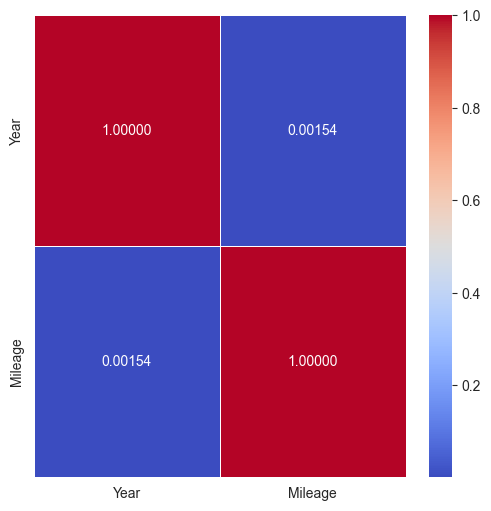

In [414]:
# in case of many variables, table may not be readable
plt.figure(figsize=(6, 6))
sns.heatmap(df_correlations,
            annot = True, 
            cmap = 'coolwarm', 
            fmt = '.5f',
            linewidths = 0.5)

### Correlation Analysis: Year vs. Mileage

A Pearson correlation analysis was performed between the numerical variables **Year** and **Mileage**:

|         | Year     | Mileage  |
|---------|----------|----------|
| **Year**    | 1.000000 | 0.001544 |
| **Mileage** | 0.001544 | 1.000000 |

- The correlation coefficient between **Year** and **Mileage** is **0.0015**, indicating an extremely weak (almost no) linear relationship.
- Since the variables are not highly correlated, there is **no multicollinearity concern**.
- ✅ **Conclusion**: Both `Year` and `Mileage` can be safely retained in the model.


In [404]:
mask = np.triu(np.ones_like(df_correlations, dtype = bool))

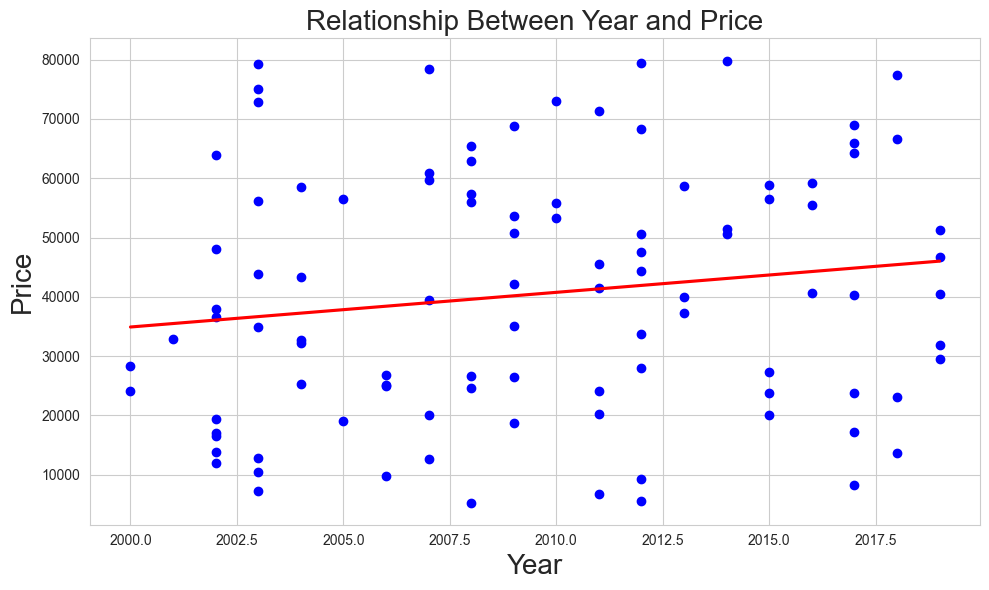

In [442]:
# Sample 10,000 points for better visualization
sample_df = df_train.sample(n=100, random_state=42)

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Year',
    y='Price',
    data=sample_df,
    scatter_kws={'color': 'blue', 'alpha': 1},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Relationship Between Year and Price', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

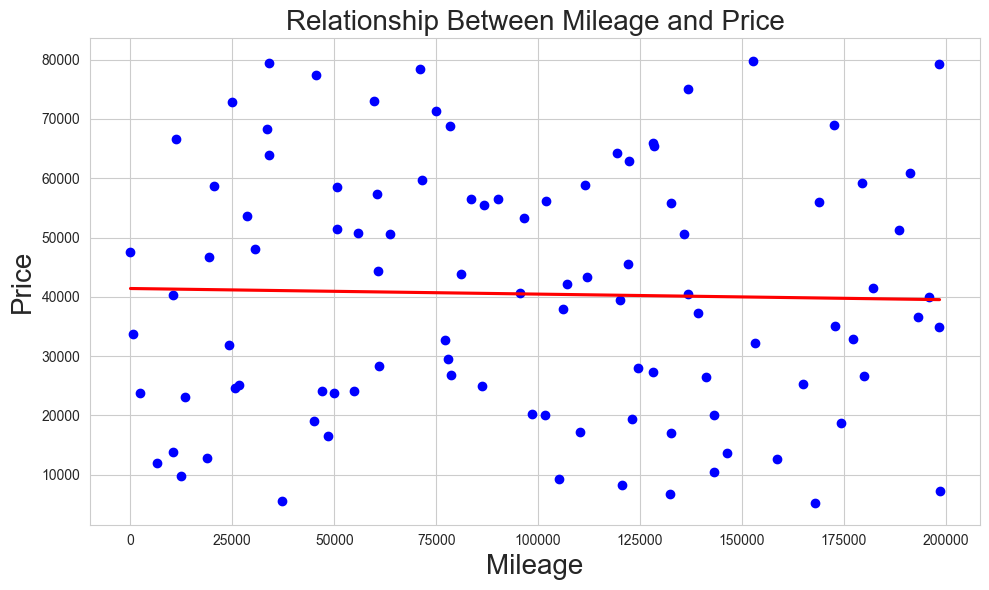

In [440]:
# Sample 10,000 points for better visualization
sample_df = df_train.sample(n=100, random_state=42)

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Mileage',
    y='Price',
    data=sample_df,
    scatter_kws={'color': 'blue', 'alpha': 1},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Relationship Between Mileage and Price', fontsize=20)
plt.xlabel('Mileage', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [454]:
df_numeric_variables = df_numeric_columns # Year, Mileage

In [456]:
df_numeric_variables.dtype

dtype('O')

## Qualitative (Categorical) variables

In [463]:
df_categorical_variables = df_train.select_dtypes('object').columns

In [465]:
df_categorical_variables

Index(['Brand', 'Model', 'Color', 'Condition', 'First Name', 'Last Name',
       'Address', 'Country'],
      dtype='object')

### Target Variables is `Price` - (dependent variable)

In [474]:
df_categorical_variables = df_categorical_variables.drop(['First Name', 
                                                          'Last Name', 'Address'])

In [480]:
df_categorical_variables.to_list()

['Brand', 'Model', 'Color', 'Condition', 'Country']

### Target (Price) ~ Car Brand - OLS
check their relationship with the target variable
because the target variable is quantitative and explanatory
these variables are qualitative, one can use the analysis of variance (ANOVA)

In [504]:
# fit the ANOVA model (Ordinary Least Squares regression)
# the C() function is used to indicate that MS_Subclass is a categorical variable
# - it is automatically recoded into dummies

In [490]:
model_brand = smf.ols('Price ~ C(Brand)', data = df_train).fit()

In [492]:
print(model_brand.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8794
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.599
Time:                        00:47:31   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799751   BIC:                         1.824e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [494]:
model_model = smf.ols('Price ~ C(Model)', data = df_train).fit()

In [496]:
print(model_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8940
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.750
Time:                        00:48:05   Log-Likelihood:            -9.1191e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799681   BIC:                         1.824e+07
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [500]:
model_color = smf.ols('Price ~ C(Color)', data = df_train).fit()

In [502]:
print(model_color.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4764
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.892
Time:                        00:48:58   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799759   BIC:                         1.824e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.245e+04     76

In [506]:
model_condition = smf.ols('Price ~ C(Condition)', data = df_train).fit()

In [508]:
print(model_condition.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1994
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.819
Time:                        00:49:44   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799766   BIC:                         1.824e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              4.25e+04 

In [510]:
model_country = smf.ols('Price ~ C(Country)', data = df_train).fit()

In [512]:
print(model_country.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7841
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.631
Time:                        00:50:14   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799759   BIC:                         1.824e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.245e+

In [530]:
# The F statistic is used to verify the null hypothesis that:
# H0: MS_SubClass does NOT impact the Sale_Price
# i.e. average Sale_Price does NOT differ
# for different values of MS_SubClass

# The higher the F-statistic (or the lower its p-value) the stronger we reject H0

In [514]:
anova_table_brand = anova_lm(model_brand)

In [520]:
anova_table_brand

,df,sum_sq,mean_sq,F,PR(>F)
C(Brand),17.0,7.014554e+09,4.126208e+08,0.879356,0.599152
Residual,799751.0,3.752678e+14,4.692308e+08,NaN,NaN


In [522]:
anova_table_model = anova_lm(model_model)

In [524]:
anova_table_model

,df,sum_sq,mean_sq,F,PR(>F)
C(Model),87.0,3.649792e+10,4.195163e+08,0.894043,0.749878
Residual,799681.0,3.752383e+14,4.692350e+08,NaN,NaN


In [526]:
anova_table_color = anova_lm(model_color)

In [528]:
anova_table_color

,df,sum_sq,mean_sq,F,PR(>F)
C(Color),9.0,2.011685e+09,2.235206e+08,0.476354,0.891514
Residual,799759.0,3.752728e+14,4.692323e+08,NaN,NaN


In [532]:
anova_table_condition = anova_lm(model_condition)

In [534]:
anova_table_condition

,df,sum_sq,mean_sq,F,PR(>F)
C(Condition),2.0,1.871300e+08,9.356501e+07,0.199401,0.819221
Residual,799766.0,3.752746e+14,4.692305e+08,NaN,NaN


In [536]:
anova_table_country = anova_lm(model_country)

In [538]:
anova_table_country

,df,sum_sq,mean_sq,F,PR(>F)
C(Country),9.0,3.311245e+09,3.679161e+08,0.784084,0.631211
Residual,799759.0,3.752715e+14,4.692307e+08,NaN,NaN


### ANOVA Analysis for Categorical Variables

To assess whether categorical variables such as **Brand**, **Model**, **Color**, **Condition**, and **Country** have a statistically significant influence on the target variable **Price**, I performed **One-Way ANOVA** using an OLS (Ordinary Least Squares) regression framework.

---

### 🔎 Purpose of ANOVA

- ANOVA tests whether the **means of different categories** significantly differ in terms of the dependent variable (Price).
- A key output is the **p-value (`PR(>F)`)**: if this is **less than 0.05**, it indicates that the variable likely has a **statistically significant impact** on the target.

---

### 📊 Results Summary

| Variable      | F-value  | p-value (`PR(>F)`) | Interpretation |
|---------------|----------|--------------------|----------------|
| **Brand**     | 0.879    | 0.599              | ❌ Not significant – brand has no strong influence on price. |
| **Model**     | 0.894    | 0.750              | ❌ Not significant – model variation does not significantly affect price. |
| **Color**     | 0.476    | 0.892              | ❌ Not significant – car color has no meaningful impact. |
| **Condition** | 0.199    | 0.819              | ❌ Not significant – condition shows no significant effect. |
| **Country**   | 0.784    | 0.631              | ❌ Not significant – country of origin has no significant role. |

---

### ⚠️ Observation

All variables produced **p-values significantly higher than 0.05**, which indicates that:
- There is **no statistically significant relationship** between these categorical variables and car price in this dataset.
- These variables **fail to explain variation** in price based on group means.

---

### ✅ Conclusion

Although these categorical features might seem important intuitively, the **ANOVA results suggest** they **do not statistically contribute** to predicting price individually. They might still be useful in **interaction terms**, **combined models**, or through **non-linear methods**, so further exploration is warranted.

ture selection techniques.


In [541]:
anova_table_brand['PR(>F)'].iloc[0]

0.5991515707870092

In [543]:
anova_table_model['PR(>F)'].iloc[0]

0.7498783938581334

In [545]:
anova_table_color['PR(>F)'].iloc[0]

0.8915142434205239

In [547]:
anova_table_condition['PR(>F)'].iloc[0]

0.8192213942056539

In [549]:
anova_table_country['PR(>F)'].iloc[0]

0.6312106878973046

In [552]:
# write a function that retrieves this value for selected categorical variables in their
# - relation with a dependent variable and a dataset provided as a function argument

def anova_for_categorical_vars(dataset, dependent_var, categorical_vars):
    results = []
    for var in categorical_vars:
        model = smf.ols(f'{dependent_var} ~ C({var})', data = dataset).fit()
        anova_table = anova_lm(model)
        f_statistic = anova_table['F'].iloc[0]
        p_value = anova_table['PR(>F)'].iloc[0]
        results.append([var, f_statistic, p_value])
        
    anova_results_df = pd.DataFrame(results,
                                   columns = ['Variable', 'F-statistic', 'p-values'])
    anova_results_df = anova_results_df.sort_values(by = 'F-statistic', ascending = False)
    
    return anova_results_df

In [554]:
df_anova_results = anova_for_categorical_vars(df_train,
                                                  'Price',
                                                  df_categorical_variables)

In [556]:
print(df_anova_results)

    Variable  F-statistic  p-values
1      Model     0.894043  0.749878
0      Brand     0.879356  0.599152
4    Country     0.784084  0.631211
2      Color     0.476354  0.891514
3  Condition     0.199401  0.819221


In [558]:
# let's see the relation of the target variable with the three categorical variables
# - which are the most strongly associated with it
# -> these variables have an impact on house prices

# y is dependent variable and x is independent variable

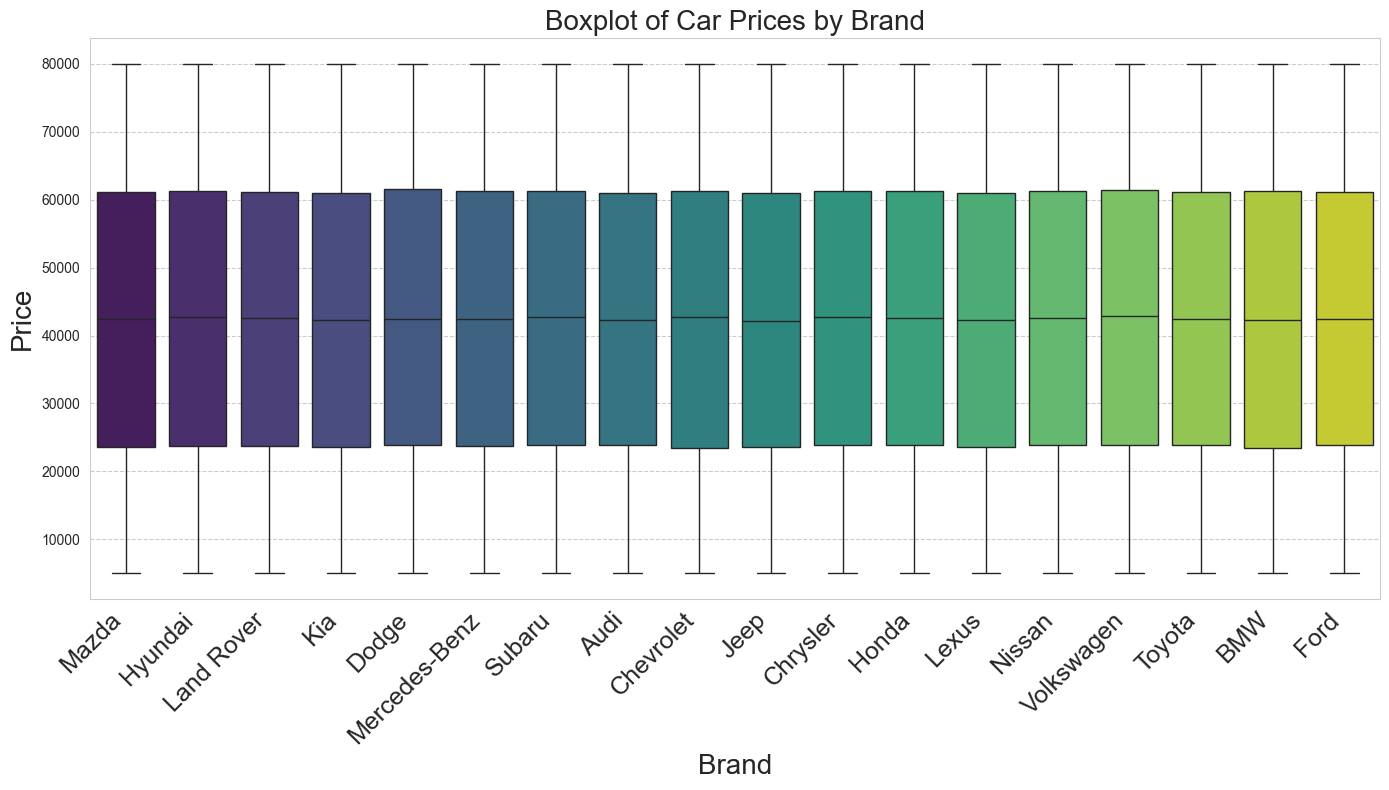

In [618]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Brand',
    y='Price',
    data=df_train,
    palette='viridis',
    showfliers=True  # False -> hides outliers for better readability
)
plt.title('Boxplot of Car Prices by Brand', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

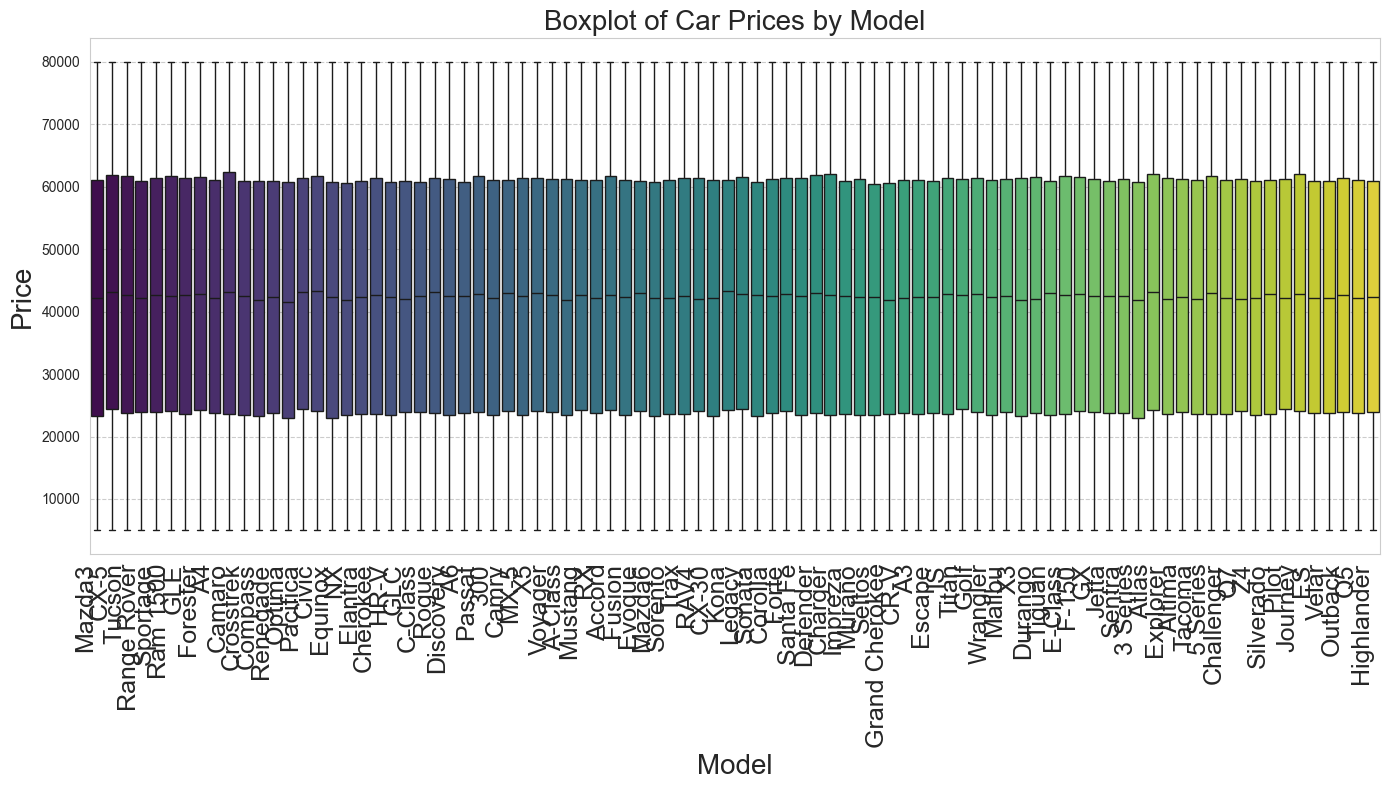

In [622]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Model',
    y='Price',
    data=df_train,
    palette='viridis', # Blues
    showfliers=True
)
plt.title('Boxplot of Car Prices by Model', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

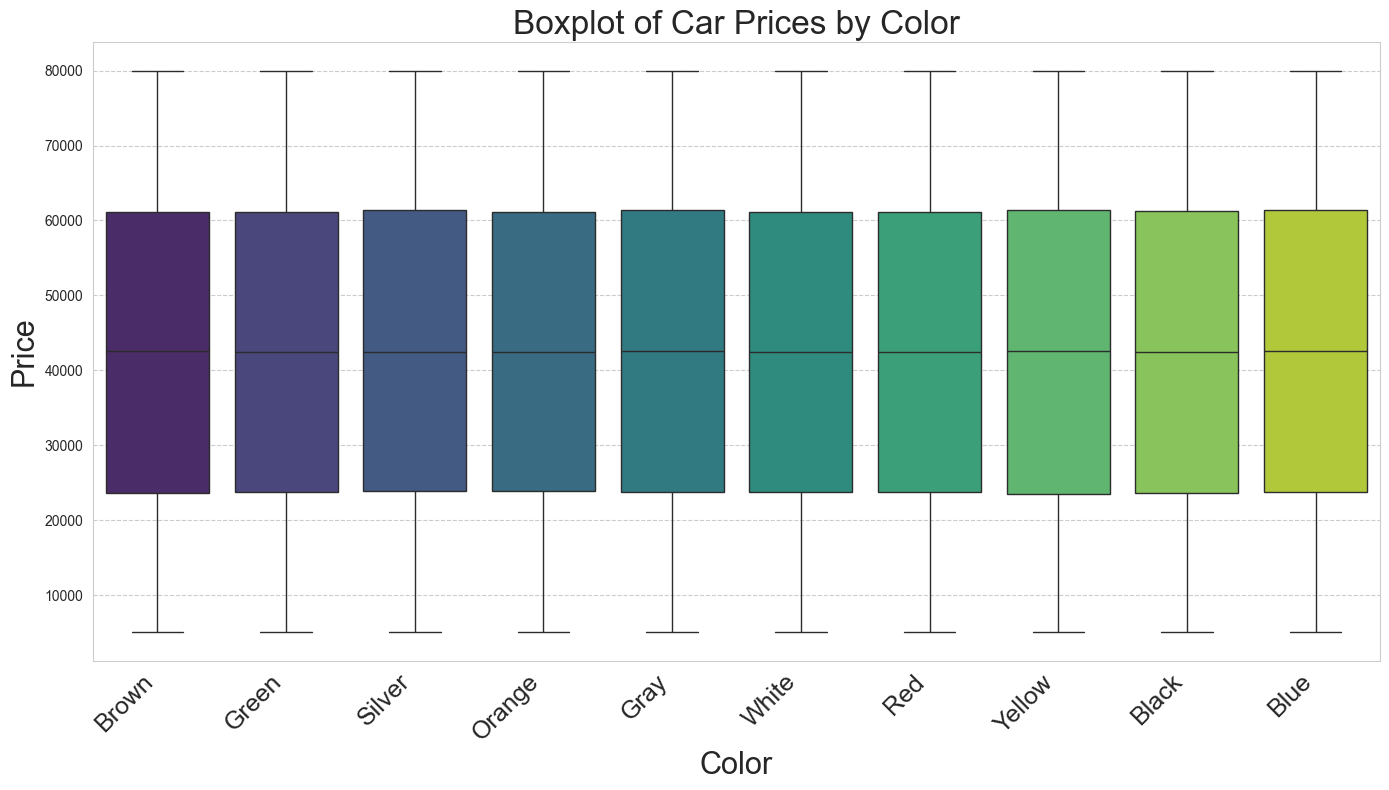

In [614]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Color',
    y='Price',
    data=df_train,
    palette='viridis', # Blues
    showfliers=True
)
plt.title('Boxplot of Car Prices by Color', fontsize=24)
plt.xlabel('Color', fontsize=22)
plt.ylabel('Price', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

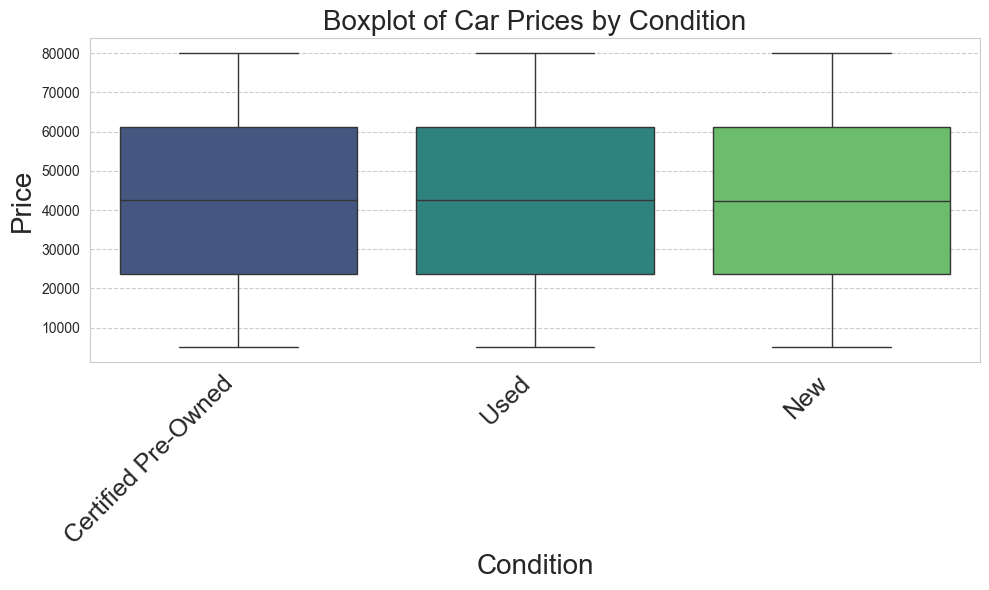

In [610]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Condition',
    y='Price',
    data=df_train,
    palette='viridis', # Blues
    showfliers=True
)
plt.title('Boxplot of Car Prices by Condition', fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

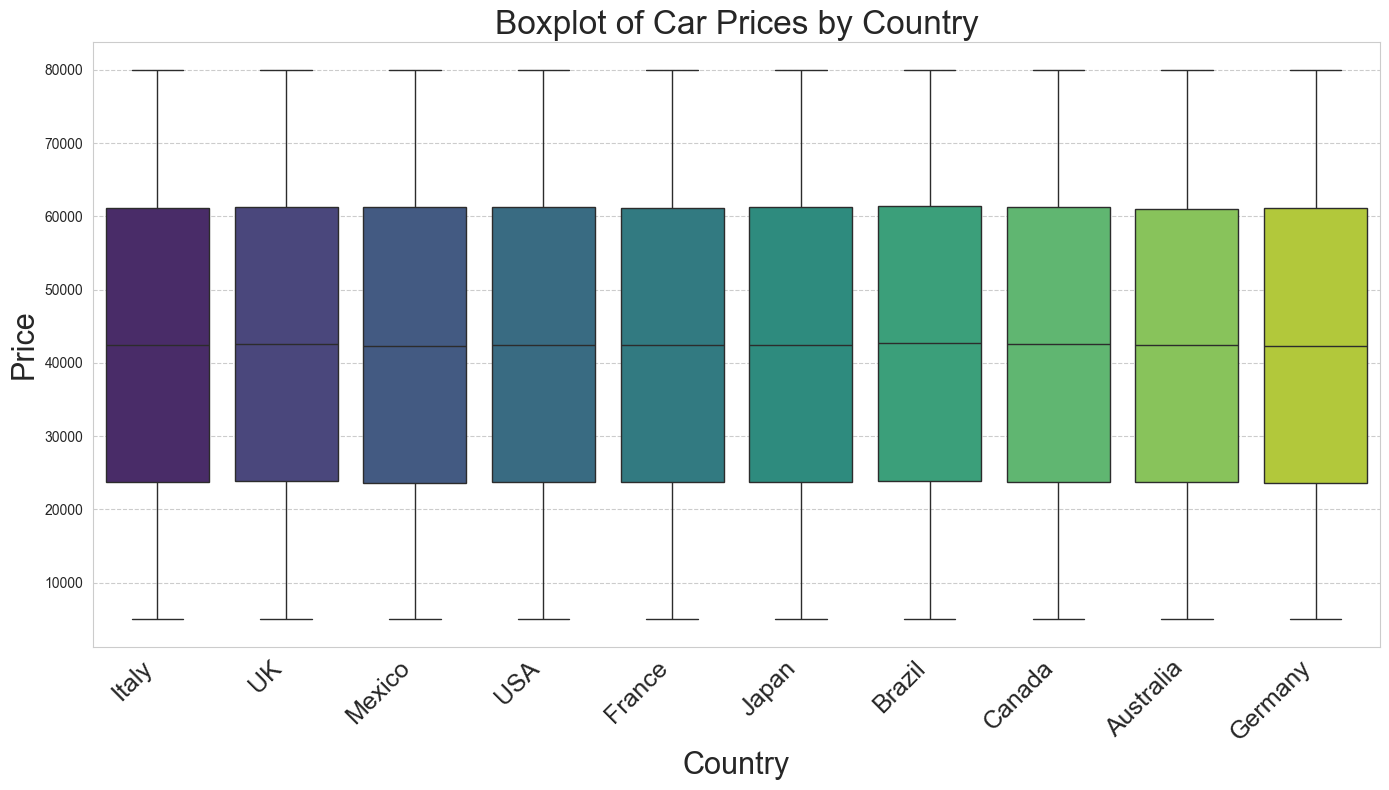

In [608]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Country',
    y='Price',
    data=df_train,
    palette='viridis', # Blues
    showfliers=True
)
plt.title('Boxplot of Car Prices by Country', fontsize=24)
plt.xlabel('Country', fontsize=22)
plt.ylabel('Price', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [624]:
df_train.Brand.value_counts()

Brand
Dodge            44781
Mercedes-Benz    44708
Volkswagen       44655
Toyota           44613
Hyundai          44595
Jeep             44569
Chevrolet        44477
Kia              44471
Ford             44435
Mazda            44422
Subaru           44398
Honda            44385
Land Rover       44385
Audi             44340
Chrysler         44299
BMW              44170
Lexus            44134
Nissan           43932
Name: count, dtype: int64

### 🚗 Brand Overview and Country of Origin

Your dataset includes car data from the following **18 brands**, each associated with its country of origin:

| Brand           | Country of Origin |
|----------------|-------------------|
| Dodge           | USA               |
| Mercedes-Benz   | Germany           |
| Volkswagen      | Germany           |
| Toyota          | Japan             |
| Hyundai         | South Korea       |
| Jeep            | USA               |
| Chevrolet       | USA               |
| Kia             | South Korea       |
| Ford            | USA               |
| Mazda           | Japan             |
| Subaru          | Japan             |
| Honda           | Japan             |
| Land Rover      | UK                |
| Audi            | Germany           |
| Chrysler        | USA               |
| BMW             | Germany           |
| Lexus           | Japan             |
| Nissan          | Japan             |

---

### ⭐ Top 3 Most Popular Brands by Frequency

Based on the dataset distribution:

1. **Dodge** — 44,781 cars  
2. **Mercedes-Benz** — 44,708 cars  
3. **Volkswagen** — 44,655 cars  

These brands represent the **highest number of observations**, indicating their prominence in the dataset.


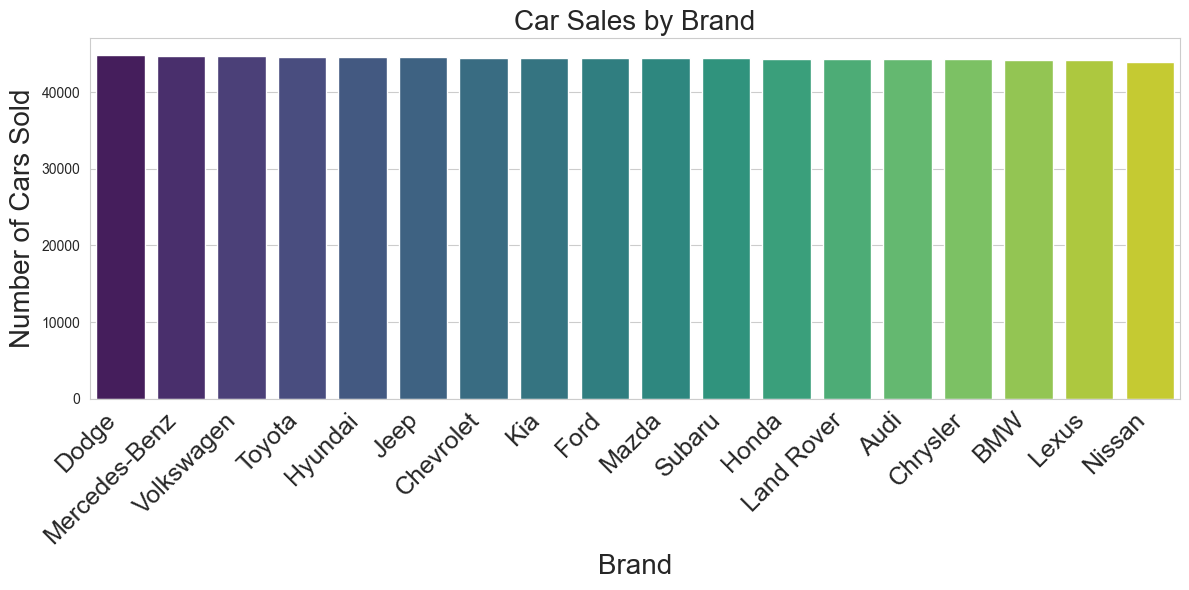

In [629]:
brands = ['Dodge', 'Mercedes-Benz', 'Volkswagen', 'Toyota', 'Hyundai', 
          'Jeep', 'Chevrolet', 'Kia', 'Ford', 'Mazda', 'Subaru', 'Honda',
          'Land Rover', 'Audi', 'Chrysler', 'BMW', 'Lexus', 'Nissan']
sales = [44781, 44708, 44655, 44613, 44595, 44569, 44477, 44471, 
         44435, 44422, 44398, 44385, 44385, 44340, 44299, 44170, 
         44134, 43932]
plt.figure(figsize=(12, 6))
sns.barplot(x=brands, y=sales, palette='viridis')
plt.title('Car Sales by Brand', fontsize=20)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Number of Cars Sold', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.tight_layout()
plt.show()

In [631]:
"""
check the mutual relationship between categorical predictors in a way similar to 
- correlation matrix

the strength of relation between two CATEGORICAL variables can be tested using 
- the Cramer's V coefficient
(calculated on the basis of Chi2 test statistic)
# Cramer's V takes values from 0 to 1, where higher values mean a stronger relationship
(if both variables have only two levels Cramer's V takes values from -1 to 1)
"""

"\ncheck the mutual relationship between categorical predictors in a way similar to \n- correlation matrix\n\nthe strength of relation between two CATEGORICAL variables can be tested using \n- the Cramer's V coefficient\n(calculated on the basis of Chi2 test statistic)\n# Cramer's V takes values from 0 to 1, where higher values mean a stronger relationship\n(if both variables have only two levels Cramer's V takes values from -1 to 1)\n"

In [633]:
def cramers_v(contingency_table):
    # calculate cramer's v statistic from a contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

def calculate_cramers_v_matrix(dataset, categorical_vars):
    # calculate cramer's v for each pair of categorical variables
    # create an empty matrix to store the results
    cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_vars), 
                       len(categorical_vars))), 
                       columns = categorical_vars,
                       index = categorical_vars)

    for i in range(len(categorical_vars)):
        for j in range(i, len(categorical_vars)):
            var_1 = categorical_vars[i]
            var_2 = categorical_vars[j]
            # create a contingency table for the two variables
            contingency_table = pd.crosstab(dataset[var_1], dataset[var_2])
            # calculate cramer's v
            cramers_v_value = cramers_v(contingency_table)
            # store the result in matrix
            cramers_v_matrix.loc[var_1, var_2] = cramers_v_value
            cramers_v_matrix.loc[var_2, var_1] = cramers_v_value  # symmetric matrix
    return cramers_v_matrix

In [635]:
df_cramers_v_matrix = calculate_cramers_v_matrix(df_train, df_categorical_variables)

In [637]:
df_anova_results

,Variable,F-statistic,p-values
1,Model,0.894043,0.749878
0,Brand,0.879356,0.599152
4,Country,0.784084,0.631211
2,Color,0.476354,0.891514
3,Condition,0.199401,0.819221


In [639]:
df_cramers_v_matrix

,Brand,Model,Color,Condition,Country
Brand,1.000000,1.000000,0.004979,0.004063,0.004250
Model,1.000000,1.000000,0.010974,0.010202,0.010163
Color,0.004979,0.010974,1.000000,0.003250,0.003758
Condition,0.004063,0.010202,0.003250,1.000000,0.002436
Country,0.004250,0.010163,0.003758,0.002436,1.000000


In [641]:
variables_order = df_anova_results.Variable.to_list()

In [643]:
variables_order

['Model', 'Brand', 'Country', 'Color', 'Condition']

In [645]:
df_cramers_v_matrix = df_cramers_v_matrix[variables_order].loc[variables_order]

In [649]:
print(df_cramers_v_matrix)

              Model     Brand   Country     Color  Condition
Model      1.000000  1.000000  0.010163  0.010974   0.010202
Brand      1.000000  1.000000  0.004250  0.004979   0.004063
Country    0.010163  0.004250  1.000000  0.003758   0.002436
Color      0.010974  0.004979  0.003758  1.000000   0.003250
Condition  0.010202  0.004063  0.002436  0.003250   1.000000


In [651]:
mask = np.triu(np.ones_like(df_cramers_v_matrix, dtype = bool))

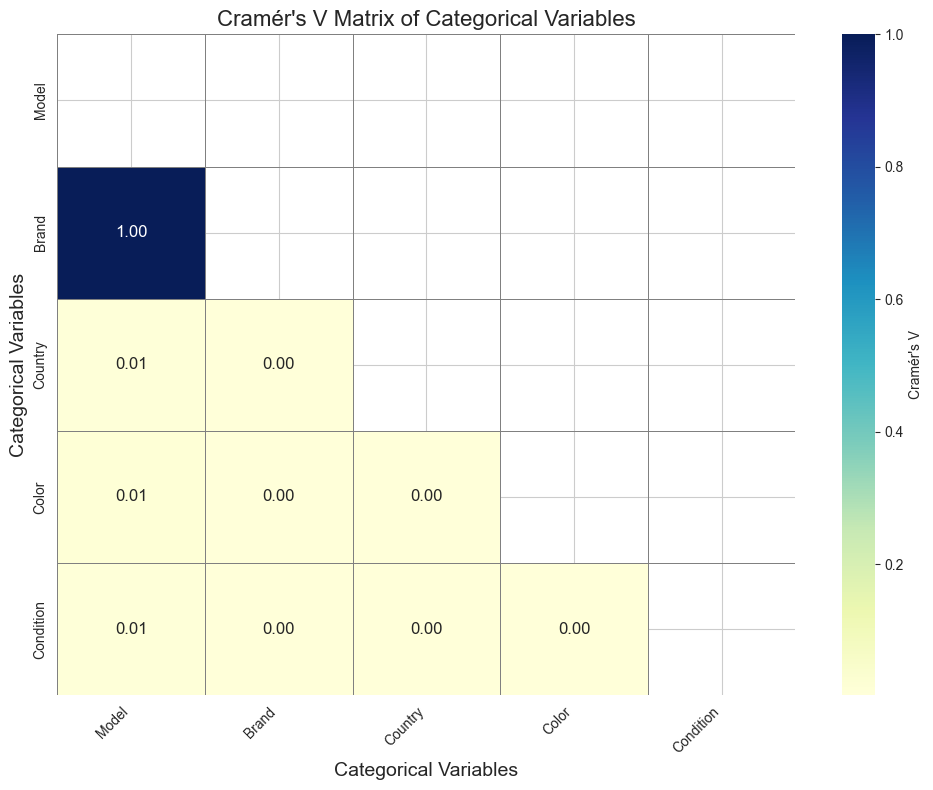

In [666]:
plt.figure(figsize=(10, 8))  # Adjusted figure size for better clarity
sns.heatmap(df_cramers_v_matrix,
            annot=True,              # Display the values in the cells
            cmap='YlGnBu',           # Chose a more visually appealing color map
            fmt='.2f',               # Format the displayed values to 2 decimal places
            mask=mask,               # Mask the upper triangular part of the matrix (if needed)
            linewidths=0.5,          # Adjust linewidth for gridlines
            linecolor='gray',        # Set gridline color for better contrast
            cbar_kws={'label': 'Cramér\'s V'},  # Add a label to the color bar for better understanding
            annot_kws={'size': 12},  # Adjust size of the annotation text
            xticklabels=df_cramers_v_matrix.columns,  # Make sure the labels are clearly shown
            yticklabels=df_cramers_v_matrix.index)  # Ensure the y-axis labels are properly shown

plt.title('Cramér\'s V Matrix of Categorical Variables', fontsize=16)  # Add title
plt.xlabel('Categorical Variables', fontsize=14)  # X-axis label
plt.ylabel('Categorical Variables', fontsize=14)  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels for better readability
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

### Cramer's V Coefficient: Explanation and Interpretation

**Cramer's V** is a measure of association between two categorical variables. It evaluates the strength of the relationship between them. It is calculated based on the **Chi-Square test statistic** and is particularly useful when dealing with categorical data.

- **Range**: Cramer's V takes values between 0 and 1. 
  - A **Cramer's V value close to 0** indicates **no association** or a **weak relationship** between the variables.
  - A **Cramer's V value close to 1** indicates a **strong relationship** between the variables.
  
- If both variables have only two levels (binary), Cramer's V can range from **-1 to 1**, where the sign indicates the direction of association (positive or negative).

### Cramer's V Coefficient Calculation

The formula for Cramer's V is:

\[
V = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
\]

Where:
- \(\chi^2\) is the chi-square statistic.
- \(n\) is the total number of observations.
- \(k\) is the smaller number of levels in the two variables.

### Results Interpretation

Here is the **Cramer's V matrix** based on the categorical variables `Brand`, `Model`, `Color`, `Condition`, and `Country` in the dataset:

|                | Brand  | Model  | Color  | Condition  | Country  |
|----------------|--------|--------|--------|------------|----------|
| **Brand**      | 1.000  | 1.000  | 0.0049 | 0.0041     | 0.0043   |
| **Model**      | 1.000  | 1.000  | 0.0109 | 0.0102     | 0.0102   |
| **Color**      | 0.005  | 0.011  | 1.000  | 0.0033     | 0.0038   |
| **Condition**  | 0.004  | 0.010  | 0.0033 | 1.000      | 0.0024   |
| **Country**    | 0.004  | 0.010  | 0.0038 | 0.0024     | 1.000    |

### Explanation of Results:

1. **Brand vs. Model**:
   - **Cramer's V = 1.000**. This indicates a **perfect association** between `Brand` and `Model`. This is likely due to the fact that specific brands have distinct models, which naturally align.

2. **Brand vs. Color**:
   - **Cramer's V = 0.0049**. This suggests there is **very little or no association** between `Brand` and `Color`, meaning that car colors are not strongly influenced by the brand.

3. **Brand vs. Condition**:
   - **Cramer's V = 0.0041**. Again, this indicates a **weak relationship** between `Brand` and `Condition`, meaning that the condition (New, Used, etc.) is not highly dependent on the brand.

4. **Brand vs. Country**:
   - **Cramer's V = 0.0043**. This suggests a **weak relationship** between `Brand` and `Country`, meaning that the country of origin does not have a strong influence on the brand of the car.

5. **Model vs. Color**:
   - **Cramer's V = 0.0109**. This also suggests a **weak relationship** between `Model` and `Color`, indicating that the car model does not strongly determine the color.

6. **Model vs. Condition**:
   - **Cramer's V = 0.0102**. This suggests that `Model` and `Condition` have a **weak relationship**, with the model not significantly determining the car's condition.

7. **Model vs. Country**:
   - **Cramer's V = 0.0102**. This also indicates a **weak relationship** between `Model` and `Country`, meaning the car model is not heavily influenced by the country.

8. **Color vs. Condition**:
   - **Cramer's V = 0.0033**. This suggests that there is a **very weak relationship** between `Color` and `Condition`, meaning that the color of a car does not significantly affect its condition.

9. **Color vs. Country**:
   - **Cramer's V = 0.0038**. Similar to the previous result, this indicates a **weak relationship** between `Color` and `Country`.

10. **Condition vs. Country**:
   - **Cramer's V = 0.0024**. This is a **very weak relationship**, meaning that the car's condition does not have a strong relationship with the country of origin.

### Conclusion:
- Most of the categorical variables in this dataset have **very weak to no relationships** with each other, as indicated by the Cramer's V values close to 0. 
- The highest values (1.000) show perfect associations, such as between `Brand` and `Model`, but for most other variable pairs, the relationships are quite weak.
  
These results suggest that the categorical predictors might not provide much explanatory power on their own for predicting `Price` or other target variables. Further feature engineering or transformations may be necessary to improve model performance.


In [672]:
df_categorical_variables # remove Brand or Model if needed

Index(['Brand', 'Model', 'Color', 'Condition', 'Country'], dtype='object')

In [670]:
df_numeric_variables

Index(['Year', 'Mileage'], dtype='object')

## Linear Regression

Let's estimate the first model. Since we will be interested in the interpretation of individual parameters, not just prediction, we will use the methods from the statsmodels library. The model formula is given in the dependent_variable ~ independent_variables system.
Y ~ X for simple regression with one explained variable (X).

If you want to include more explanatory variables, they should be separated in the model formula with pluses "+", ex: Y ~ X1 + X2 + X3.



In [684]:
model_year = smf.ols(formula = 'Price ~ Year', data = df_train).fit()

In [690]:
print(model_year.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1110
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.739
Time:                        01:35:09   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799767   BIC:                         1.824e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.968e+04   8439.252      4.702      0.0

In [692]:
model_mileage = smf.ols(formula='Price ~ Mileage', data = df_train).fit()

In [696]:
print(model_mileage.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04317
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.835
Time:                        01:36:05   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799767   BIC:                         1.824e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.248e+04     48.446    876.856      0.0

In [698]:
# categorical independent OLS
model_brand
model_model
model_color
model_condition
model_country

# numeric independent OLS
model_year
model_mileage

In [706]:
# estimate the model with more explanatory variables (quantitative)
model_year_mileage = smf.ols(
    formula = 'Price ~ Year + Mileage',
    data = df_train
).fit()

In [710]:
print(model_year_mileage.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07696
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.926
Time:                        01:39:36   Log-Likelihood:            -9.1192e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799766   BIC:                         1.824e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.967e+04   8439.306      4.701      0.0

In [712]:
model_all_categorical = smf.ols(
    formula = 'Price ~ Brand + Model + Color + Condition + Country',
    data = df_train
).fit()

In [715]:
print(model_all_categorical.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6205
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.999
Time:                        01:45:10   Log-Likelihood:            -9.1191e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799661   BIC:                         1.824e+07
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

In [717]:
# although ordinal features were recoded with the OrdinalEncoder, 
# they still have the type "object" in the DataFrame
df_train_encoded.select_dtypes(include='object').head()

,Condition,First Name,Last Name,Address
1,1.0,John,Harris,101 Maple Dr
2,1.0,Karen,Wilson,202 Birch Blvd
3,2.0,Susan,Martinez,123 Main St
4,2.0,Charles,Miller,456 Oak Ave
5,2.0,Joseph,Moore,789 Pine Rd


In [727]:
df_train_encoded = df_train_encoded.drop(['First Name', 'Last Name', 'Address'], axis=1)

In [735]:
print(df_train_encoded.select_dtypes(include='object').head())

Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5]


In [737]:
# to make sure that the type of the variable is correct,
# we can convert it to the numeric type
df_train_encoded = df_train_encoded.apply(pd.to_numeric)

In [739]:
print(df_train_encoded.select_dtypes(include='object').head())

Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5]


In [743]:
df_train_encoded.head()

,Year,Price,Mileage,Condition,Price_Log,Brand_BMW,Brand_Chevrolet,Brand_Chrysler,Brand_Dodge,Brand_Ford,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
1,2000,12027.14,60990,1.0,9.395004,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2014,49194.93,1703,1.0,10.803566,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2003,11955.94,25353,2.0,9.389067,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,10910.01,76854,2.0,9.297528,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2002,69148.83,26476,2.0,11.144031,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [890]:
X_train = sm.add_constant(df_train_encoded.drop(columns=['Price', 'Price_Log']))

y_train = df_train_encoded['Price']

In [759]:
model_full_ols = sm.OLS(y_train, X_train).fit()

In [761]:
print(model_full_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8294
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.901
Time:                        02:23:31   Log-Likelihood:            -9.1191e+06
No. Observations:              799769   AIC:                         1.824e+07
Df Residuals:                  799660   BIC:                         1.824e+07
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.747e+04 

In [763]:
# define the function that will perform backward elimination
# using AIC or BIC as the criterion

def backward_elimination_aic_bic(X, y, criterion = 'AIC'):
    model = sm.OLS(y, X).fit()
    while len(X.columns) > 1: # at least one predictor + constant
        best_criterion = model.aic if criterion == 'AIC' else model.bic
        # computer AIC/BIC for models without each predictor
        aic_bic_values = {}
        for col in X.columns[1:]:  # skip intercept
            X_new = X.drop(columns = [col])
            new_model = sm.OLS(y, X_new).fit()
            aic_bic_values[col] = new_model.aic if criterion == 'AIC' else new_model.bic
        worst_feature = min(aic_bic_values, key=aic_bic_values.get)
        worst_aic_bic = aic_bic_values[worst_feature]
        # stop if no improvement
        if worst_aic_bic >= best_criterion:
            break
        # remove the feature and update the model
        X = X.drop(columns = [worst_feature])
        model = sm.OLS(y, X).fit()
    return model

### Saving the Model Using `pickle`

In this project, the trained OLS regression model was saved using Python's built-in `pickle` module:

In [765]:
with open('data/model_full_ols.pkl', 'wb') as f:
    pickle.dump(model_full_ols, f)

In [772]:
print(model_full_ols.params)

const             37468.016119
Year                  1.461301
Mileage               0.000087
Condition            14.397206
Brand_BMW          1524.209122
                      ...     
Country_Italy        54.857607
Country_Japan        70.291501
Country_Mexico      -21.538282
Country_UK          108.061640
Country_USA          20.741983
Length: 126, dtype: float64


## Forecasting / Predicting

In [785]:
df_test_encoded = df_test_encoded.drop(['First Name', 'Last Name', 'Address'], axis=1)

In [888]:
# Prepare test data
X_test = sm.add_constant(df_test_encoded.drop(columns=['Price']))
y_test = df_test_encoded['Price']

In [789]:
# Predict
y_pred = model_full_ols.predict(X_test)

In [795]:
y_pred.head(10)

0     42967.746148
6     42560.871492
13    42358.055847
19    42445.536474
31    42439.669077
33    42857.007189
34    42887.442805
46    42236.745912
47    42516.261749
48    42632.724721
dtype: object

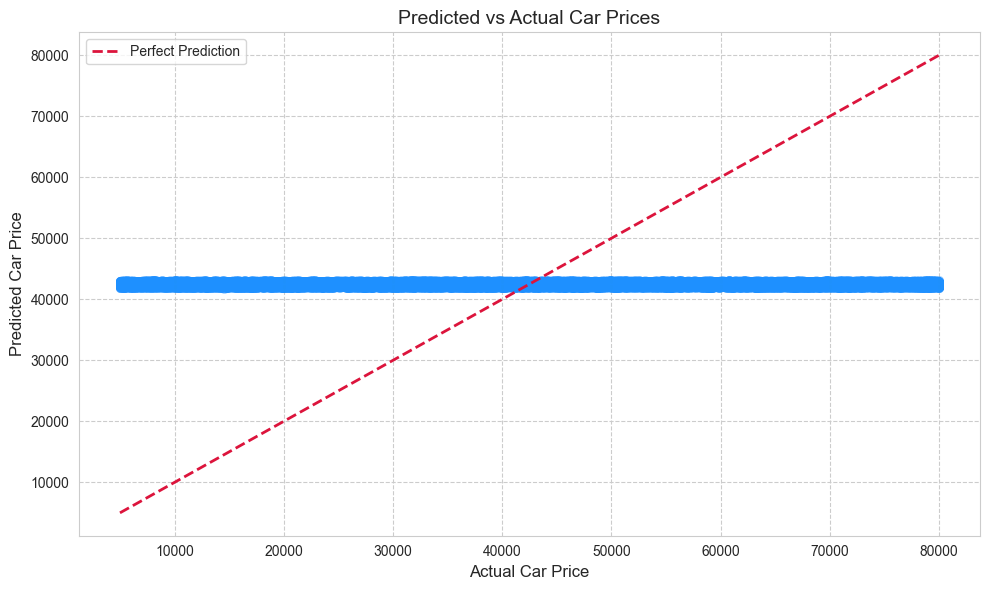

In [803]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='dodgerblue', edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='crimson', lw=2, linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Car Price', fontsize=12)
plt.ylabel('Predicted Car Price', fontsize=12)
plt.title('Predicted vs Actual Car Prices', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [805]:
# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Show the first few rows
print(comparison.head())

    Actual Price Predicted Price
0       25627.20    42967.746148
6       25023.34    42560.871492
13      43074.72    42358.055847
19      41406.09    42445.536474
31      66282.81    42439.669077


## Linear Regression Model Evaluation

### 🎯 Objective
The purpose of the linear regression model was to predict car prices based on various features from the encoded dataset.

---

### 📊 Sample Prediction Results

Here is a preview of the first few predictions from the linear regression model:

| **Actual Price** | **Predicted Price** |
|------------------|---------------------|
| 25,627.20        | 42,967.75           |
| 25,023.34        | 42,560.87           |
| 43,074.72        | 42,358.06           |
| 41,406.09        | 42,445.54           |
| 66,282.81        | 42,439.67           |

---

### 🔎 Observations

From the output, we observe that **predicted prices are considerably higher** than the actual prices, with some predictions being much higher than the true car prices. This indicates that the linear regression model has a **bias towards over-predicting**.

---

### 🧠 Conclusion

- **Model Performance**: The linear regression model appears to be **underperforming**. The predictions show a consistent deviation from the actual prices, indicating poor fit or improper model assumptions.
- **Model Bias**: There is a tendency for the model to overestimate car prices significantly. This suggests that the linear relationship assumption might not fully capture the true compleof overfitting and improve model performance.

---

This evaluation shows that while linear regression provides a basic predictive model, it may not be sophisticated enough for accurately predicting car prices in this dataset.


## Random Forest

In [809]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [847]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   const  Year  Mileage  Condition  Brand_BMW  Brand_Chevrolet  \
1    1.0  2000    60990        1.0          0                0   
2    1.0  2014     1703        1.0          0                0   
3    1.0  2003    25353        2.0          0                0   
4    1.0  2012    76854        2.0          0                0   
5    1.0  2002    26476        2.0          0                0   

   Brand_Chrysler  Brand_Dodge  Brand_Ford  Brand_Honda  ...  Color_Yellow  \
1               0            0           0            0  ...             0   
2               0            0           0            0  ...             0   
3               0            0           0            0  ...             0   
4               0            0           0            0  ...             0   
5               0            0           0            0  ...             0   

   Country_Brazil  Country_Canada  Country_France  Country_Germany  \
1               0               0               0               

In [821]:
# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=50,        # fewer trees (e.g. 50 instead of 100)
    max_depth=10,           # limit tree depth to reduce complexity
    max_features='sqrt',    # fewer features at each split
    n_jobs=-1,              # use all CPU cores
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      n_jobs=-1, random_state=42)

In [823]:
# Predict
y_pred = rf_model.predict(X_test)

In [829]:
y_pred

array([42633.5644668 , 42460.04540409, 42561.64577583, ...,
       42467.56746733, 42368.2131157 , 42477.65299229])

In [833]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [837]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show first few predictions vs actual
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison_df.head())

Mean Absolute Error: 18767.252989349716
Mean Squared Error: 469129244.05140585
Root Mean Squared Error: 469129244.05140585
R² Score: -0.00016302375196408647
     Actual     Predicted
0  25627.20  42633.564467
1  25023.34  42460.045404
2  43074.72  42561.645776
3  41406.09  42368.816133
4  66282.81  42514.936861


## Random Forest Regressor Model Evaluation

### 🎯 Objective
The goal of this model is to predict car prices based on various features in the encoded dataset.

---

### ⚙️ Model Setup

The Random Forest Regressor model was configured with 50 trees and a maximum depth of 10. We also limited the number of features considered for each split and made use of all CPU cores to speed up the process. These configurations aimed to balance between model complexity and computation time.

---

### 📊 Performance Metrics

The model's evaluation on the test dataset resulted in the following performance metrics:

- **Mean Absolute Error (MAE)**: The model's predictions are, on average, off by **18,767.25 units** compared to the actual car prices.
- **Mean Squared Error (MSE)**: The squared differences between the predicted and actual prices averaged at **469,129,244.05**, indicating a large error margin.
- **Root Mean Squared Error (RMSE)**: The standard deviation of the residuals (errors) was **21,660.84**, showing significant variation.
- **R² Score**: The **negative R² score of -0.00016** suggests that the model performs worse than a simple mean-based prediction, implying poor model performance in terms of explaining variance.

---

### 🧾 Prediction Sample

A comparison between the actual and predicted car prices showed that the model's predictions were consistently higher than the true values:

| Actual Price | Predicted Price |
|--------------|-----------------|
| 25,627.20    | 42,633.56       |
| 25,023.34    | 42,460.05       |
| 43,074.72    | 42,561.64       |
| 41,406.09    | 42,368.82       |
| 66,282.81    | 42,514.94       |

This indicates that the model has difficulty in capturing the true price variation and tends to overestimate.

---

### 🧠 Conclusion

The model appears to **underfit** the data, as indicated by the negative R² score and large prediction errors. This suggests that the current Random Forest model does not adequately capture the underlying patterns in the data. 

**Possible reasons for poor performance:**
- **Over-simplified model configuration**, such as limiting tree depth and reducing the number of trees.
- **Unimportant or irrelevant features** may be included, or the model may not be leveraging the most impactful variables.
- The dataset might have **high variance** or **noise**, making

  del's performance is stable and not biased towards the test data.

---


In [857]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.2/150.0 MB 1.8 MB/s eta 0:01:25
   ---------------------------------------- 0.6/150.0 MB 4.0 MB/s eta 0:00:38
   ---------------------------------------- 1.3/150.0 MB 6.2 MB/s eta 0:00:24
    --------------------------------------- 2.0/150.0 MB 8.0 MB/s eta 0:00:19
    --------------------------------------- 2.7/150.0 MB 9.2 MB/s eta 0:00:16
    --------------------------------------- 3.5/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 4.2/150.0 MB 10.8 MB/s eta 0:00:14
   - -------------------------------------- 4.9/150.0 MB 11.2 MB/s eta 0:00:13
   - -------------------------------------- 5.7/150.0 MB 11.7 MB/s eta 0:00:13
   - -------------------------------------- 6.4/150.0 MB 12.0 MB/s eta 0

## XGBOOST

In [868]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [884]:
# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,         # Number of boosting rounds
    learning_rate=0.1,        # Step size at each iteration
    max_depth=6,              # Depth of the trees
    random_state=42,          # Random state for reproducibility
    n_jobs=-1                 # Use all CPU cores for faster training
)

In [878]:
print(df_test_encoded.select_dtypes(include='object').head())

   Condition
0        1.0
6        1.0
13       2.0
19       1.0
31       0.0


In [880]:
df_test_encoded = df_test_encoded.apply(pd.to_numeric)

In [882]:
print(df_test_encoded.select_dtypes(include='object').head())

Empty DataFrame
Columns: []
Index: [0, 6, 13, 19, 31]


In [892]:
# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [896]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [898]:
# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 18771.59816476111
Mean Squared Error: 469528593.2193431
Root Mean Squared Error: 469528593.2193431
R² Score: -0.001014418706343001


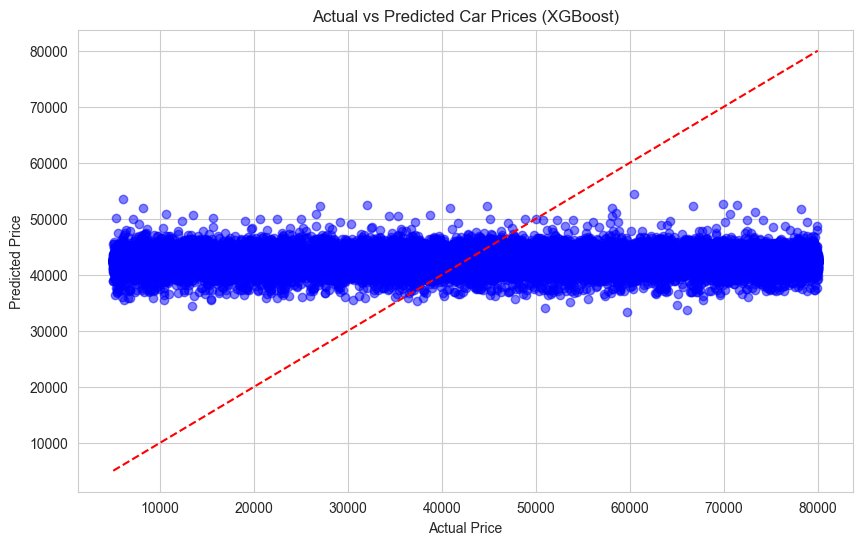

In [900]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Car Prices (XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### XGBoost Model Performance

After training the XGBoost model on the encoded dataset, we evaluated the model's performance using the following metrics:

1. **Mean Absolute Error (MAE)**:  
   - **18771.60**  
   This value indicates the average magnitude of errors in the model’s predictions. On average, the model's predictions are off by approximately 18,772 units from the actual prices. A lower value for MAE would suggest a more accurate model.

2. **Mean Squared Error (MSE)**:  
   - **469,528,593.22**  
   This is the average of the squared differences between actual and predicted values. Larger errors have a disproportionately large impact on the MSE, making it sensitive to outliers. In this case, the high value suggests that the model is struggling with large errors in some predictions.

3. **Root Mean Squared Error (RMSE)**:  
   - **469,528,593.22**  
   RMSE is the square root of the MSE, providing an error metric that has the same unit as the target variable (price). The large RMSE value confirms that there are significant prediction errors in the model.

4. **R² Score**:  
   - **-0.0010**  
   The R² score is negative, which means the model performs worse than a simple mean-based model. This suggests that the model is failing to explain the variance in the data and is likely making inaccurate predictions.